## 事件驱动
1. 读取本地数据
2. 添加均线金叉事件
3. 计算binary事件
4. 查看绩效

## 1_读取本地数据

In [1]:
import numpy as np
from jaqs.data import DataView
from jaqs.research import SignalDigger
import warnings

warnings.filterwarnings("ignore")
dataview_folder = '../../JAQS_Data/hs300'
dv = DataView()
dv.load_dataview(dataview_folder)

D:\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


Dataview loaded successfully.


In [2]:
mask = dv.get_ts('mask_index_member')
can_enter = dv.get_ts('can_enter')
can_exit = dv.get_ts('can_exit')

## 2_添加金叉事件

In [3]:
dv.remove_field('above')
dv.remove_field('delay_above')
dv.remove_field('sig_cross')

Field name [above] does not exist.
Field name [delay_above] does not exist.
Field name [sig_cross] does not exist.


In [4]:
def add_event():
    dv.add_formula('above', ' Ts_Mean(close_adj, 10) >= Ts_Mean(close_adj, 40)', is_quarterly=False)
    dv.add_formula('delay_above', 'Delay(above, 1)', is_quarterly=False)
    dv.add_formula('sig_cross', 'above&&(!delay_above)', is_quarterly=False)
add_event()

## 3_计算binary事件

In [5]:
import matplotlib.pyplot as plt

def cal_obj(signal, name, period):
    price = dv.get_ts('close_adj').loc[20160105:]
#     price_bench = dv.data_benchmark.loc[20160105:]

    # Step.4 analyze!
    obj = SignalDigger()
    
    df_all, df_events, df_stats = obj.create_binary_event_report(signal.loc[20160105:], price, mask.loc[20160105:], can_enter.loc[20160105:], can_exit.loc[20160105:],periods=[period,period*2, period*3])
    res = obj.create_full_report()
    
    print(df_stats)
    return obj
    
def plot_pfm(signal, name, period=5):
    obj = cal_obj(signal, name, period)
    obj.fig_objs
    plt.show()
    
def signal_data(signal, name, period=5):
    obj = cal_obj(signal, name, period)
    return obj.signal_data

In [6]:
signal = dv.get_ts('sig_cross')

In [7]:
print(signal.head())

symbol      000001.SZ  000002.SZ  000008.SZ  000009.SZ  000012.SZ  000021.SZ  \
trade_date                                                                     
20120104          NaN        NaN        NaN        NaN        NaN        NaN   
20120105          NaN        NaN        NaN        NaN        NaN        NaN   
20120106          0.0        0.0        0.0        0.0        0.0        0.0   
20120109          0.0        0.0        0.0        0.0        0.0        0.0   
20120110          0.0        0.0        0.0        0.0        0.0        0.0   

symbol      000024.SZ  000027.SZ  000031.SZ  000039.SZ    ...      601998.SH  \
trade_date                                                ...                  
20120104          NaN        NaN        NaN        NaN    ...            NaN   
20120105          NaN        NaN        NaN        NaN    ...            NaN   
20120106          0.0        0.0        0.0        0.0    ...            0.0   
20120109          0.0        0.0       

## 4_查看事件绩效
1. 统计信息
2. 回测绩效
3. 事件表格

Nan Data Count (should be zero) : 0;  Percentage of effective data: 53%
Nan Data Count (should be zero) : 0;  Percentage of effective data: 53%
Nan Data Count (should be zero) : 0;  Percentage of effective data: 53%

       Calendar Distribution    (3696 occurance from 2016-01-05 to 2017-12-22):
Figure saved: E:\QTC\PythonQTC\course\4_Selection\JAQS\event_report.pdf


Value of signals of Different Quantiles Statistics
          min  max      mean       std   count  count %
quantile                                               
1         0.0  1.0  0.015204  0.122365  136475    100.0
Figure saved: E:\QTC\PythonQTC\course\4_Selection\JAQS\returns_report.pdf
Information Analysis
                ic
IC Mean     -0.002
IC Std.      0.066
t-stat(IC)  -0.742
p-value(IC)  0.459
IC Skew     -0.049
IC Kurtosis -0.540
Ann. IR     -0.037
Figure saved: E:\QTC\PythonQTC\course\4_Selection\JAQS\information_report.pdf
                   Annu. Ret.  Annu. Vol.    t-stat  p-value  skewness  \
trade_date 

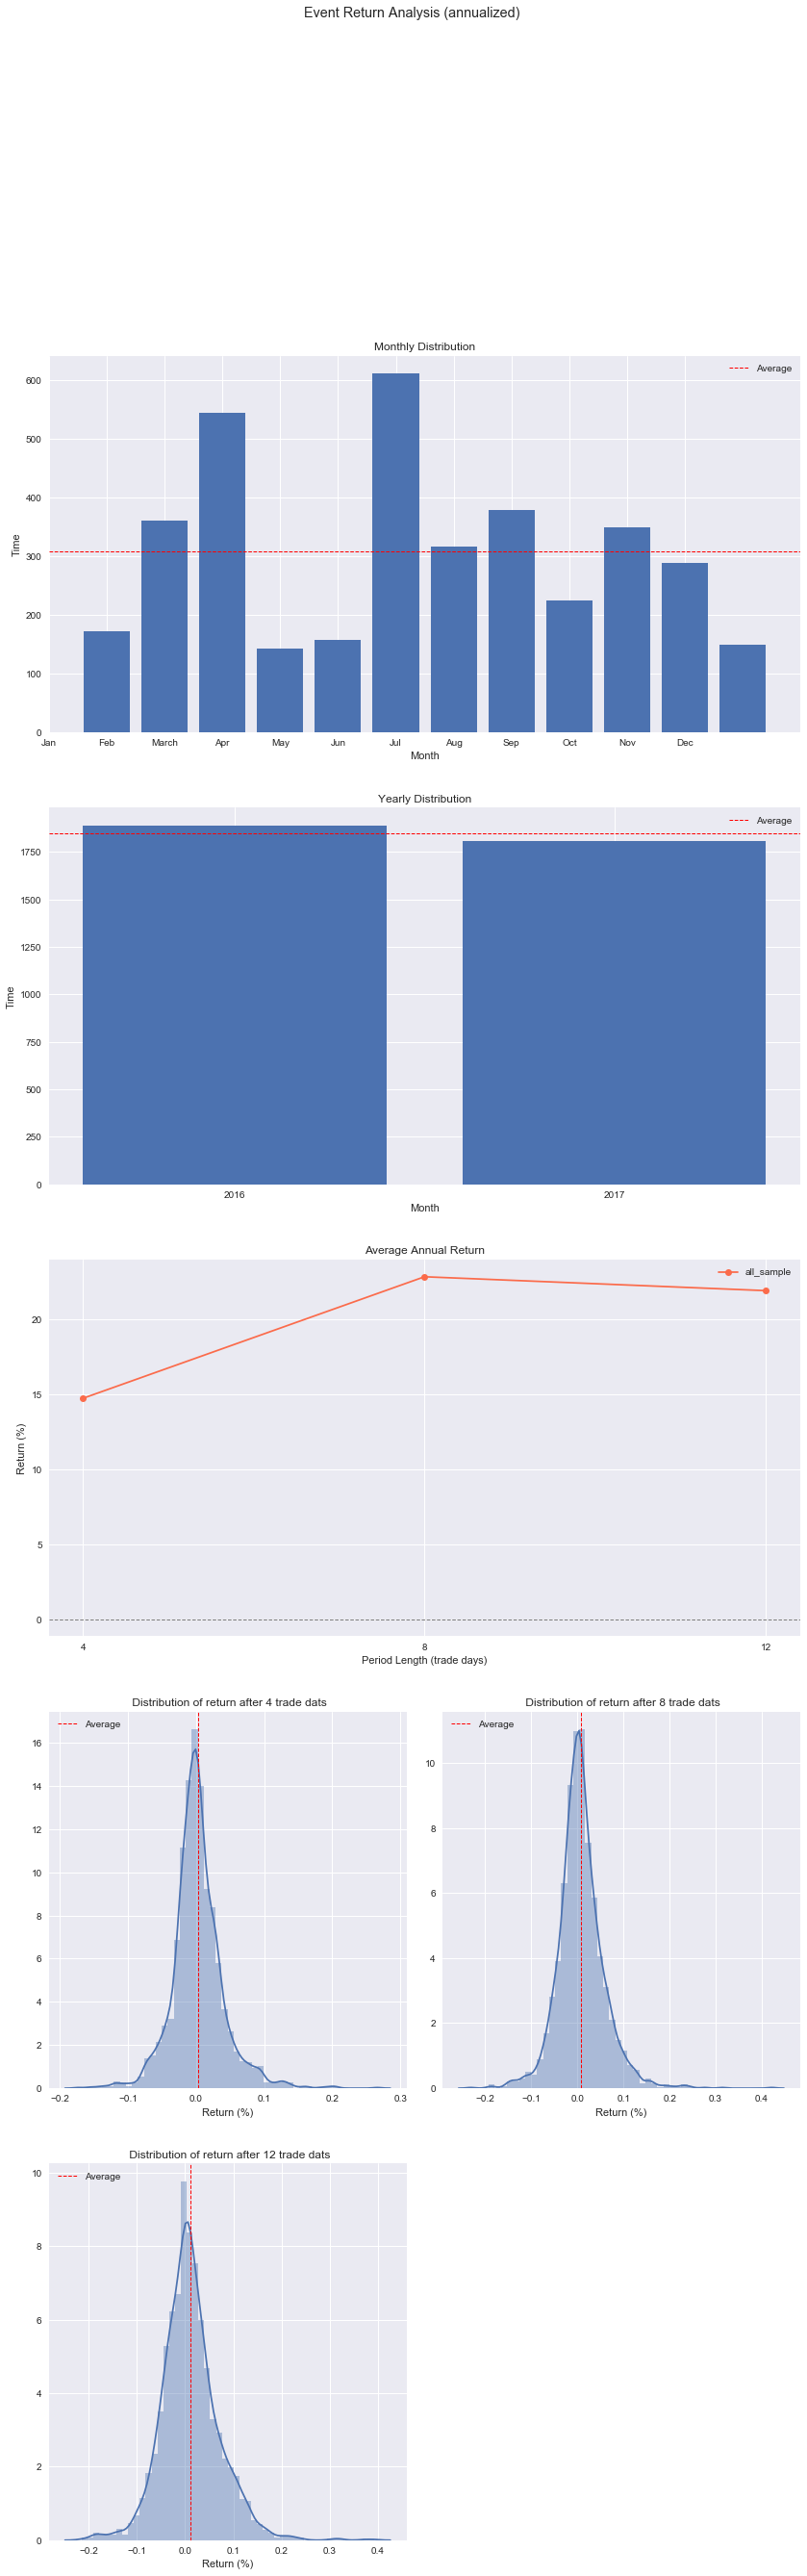

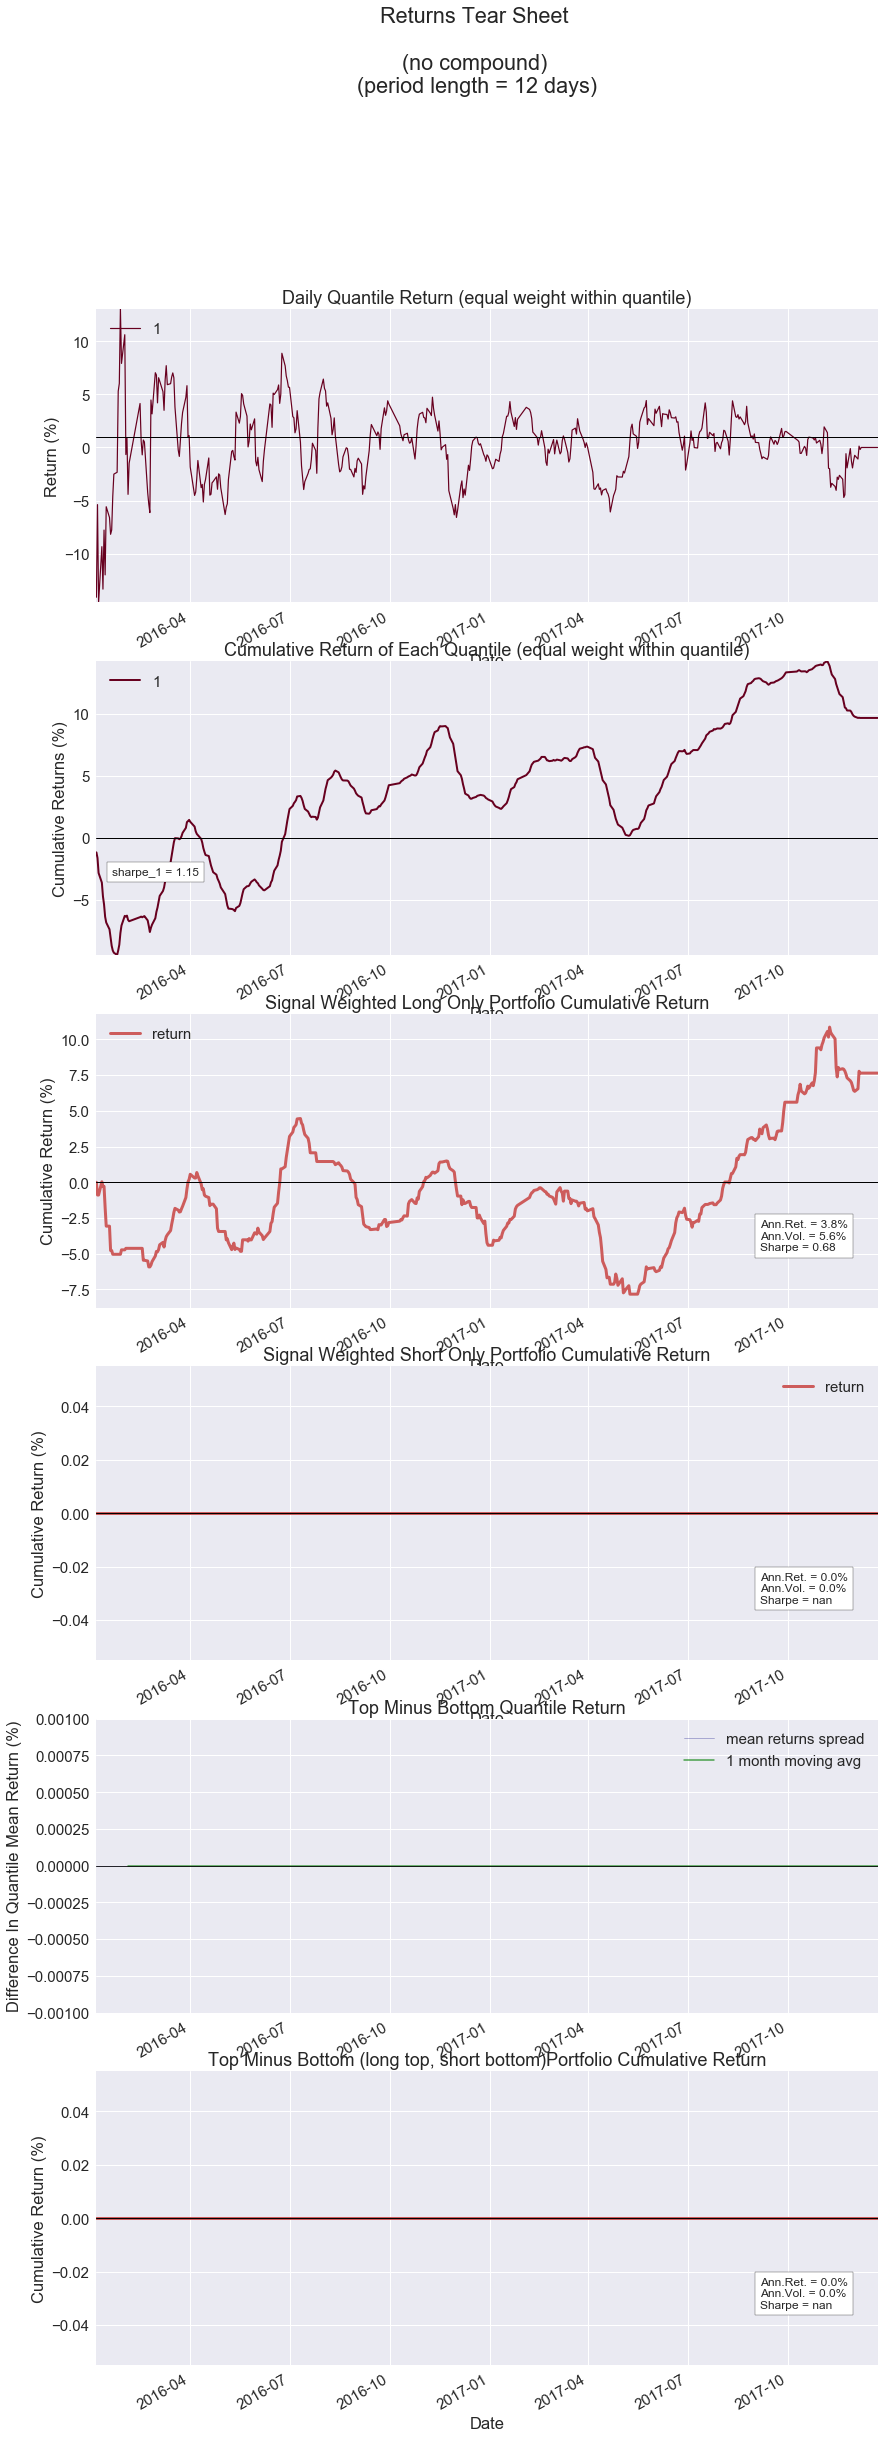

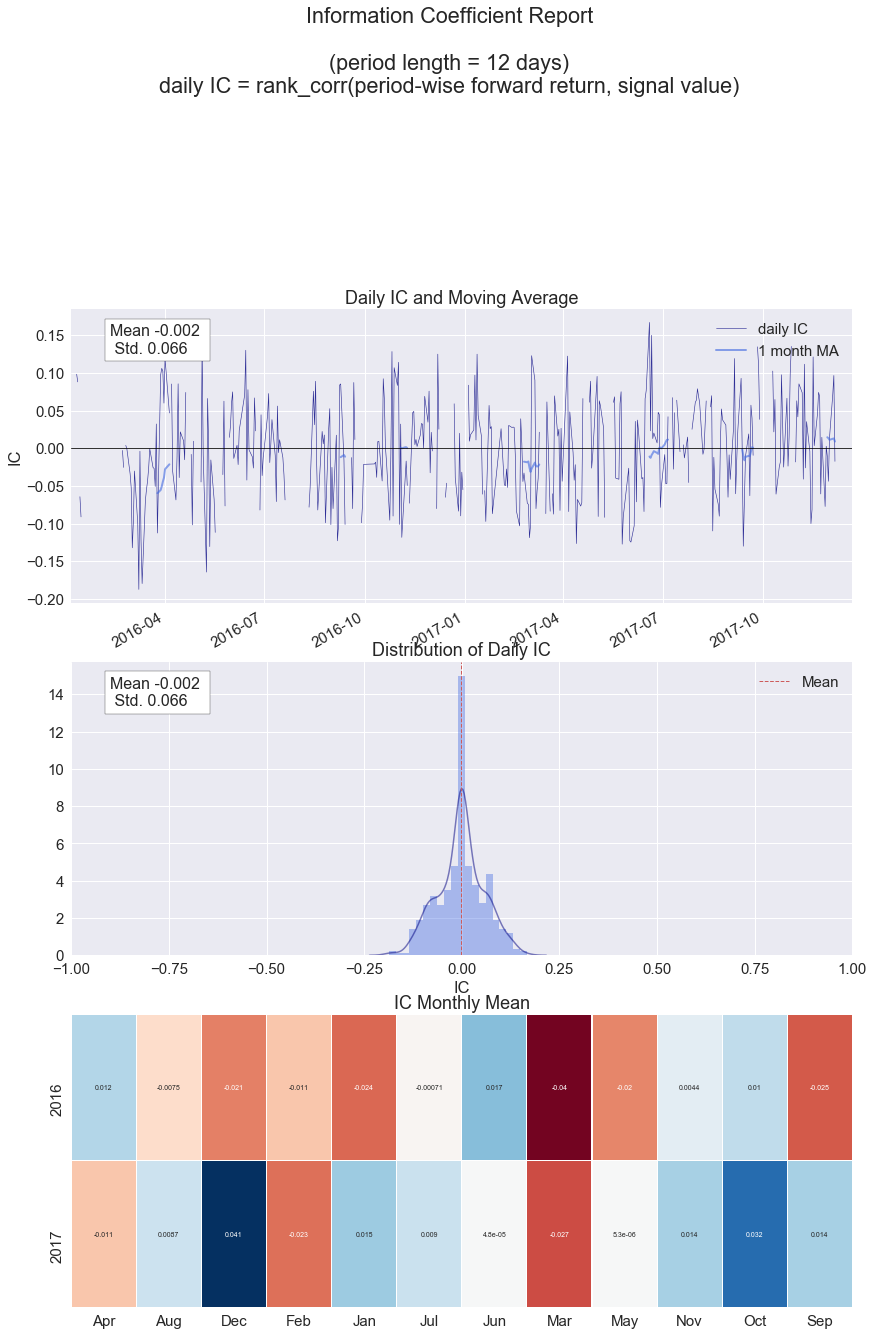

In [8]:
#统计信息
#回测绩效
plot_pfm(signal,'cross_sig', period=4)

In [9]:
signal_data = signal_data(signal,'cross_sig', period=8)

Nan Data Count (should be zero) : 0;  Percentage of effective data: 53%
Nan Data Count (should be zero) : 0;  Percentage of effective data: 53%
Nan Data Count (should be zero) : 0;  Percentage of effective data: 53%

       Calendar Distribution    (3696 occurance from 2016-01-05 to 2017-12-22):
Figure saved: E:\QTC\PythonQTC\course\4_Selection\JAQS\event_report.pdf


Value of signals of Different Quantiles Statistics
          min  max      mean       std   count  count %
quantile                                               
1         0.0  1.0  0.015204  0.122365  136475    100.0
Figure saved: E:\QTC\PythonQTC\course\4_Selection\JAQS\returns_report.pdf
Information Analysis
                ic
IC Mean     -0.007
IC Std.      0.066
t-stat(IC)  -2.145
p-value(IC)  0.033
IC Skew      0.035
IC Kurtosis -0.661
Ann. IR     -0.110
Figure saved: E:\QTC\PythonQTC\course\4_Selection\JAQS\information_report.pdf
                   Annu. Ret.  Annu. Vol.    t-stat  p-value  skewness  \
trade_date 

In [10]:
signal_df = signal_data.signal[signal_data.signal==1].unstack()

In [11]:
# 事件表格
print(signal_df.tail().stack())

trade_date  symbol   
20171218    002008.SZ    1.0
            600519.SH    1.0
20171219    600009.SH    1.0
20171220    002608.SZ    1.0
            601117.SH    1.0
            601933.SH    1.0
20171221    000568.SZ    1.0
            002304.SZ    1.0
            002508.SZ    1.0
            002555.SZ    1.0
            600276.SH    1.0
            600660.SH    1.0
20171222    601939.SH    1.0
            603833.SH    1.0
dtype: float64


In [12]:
signal_df.to_excel('signal_df.xlsx')